# Preparation

In [ ]:
# ‡∏ô‡∏≥‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏•‡∏ö‡∏£‡∏≤‡∏£‡∏µ‡∏ó‡∏µ‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
# ‡∏î‡∏≤‡∏ß‡∏ô‡πå‡πÇ‡∏´‡∏•‡∏î‡πÑ‡∏ü‡∏•‡πå‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2023-08-26 09:27:32--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‚Äòbook-crossings.zip.1‚Äô

book-crossings.zip. 100%[===================>]  24.88M   162MB/s    in 0.2s    

2023-08-26 09:27:32 (162 MB/s) - ‚Äòbook-crossings.zip.1‚Äô saved [26085508/26085508]

Archive:  book-crossings.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [ ]:
# ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡πÄ‡∏Ç‡πâ‡∏≤ DataFrame
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

# ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏£‡∏ï‡∏ï‡∏¥‡πâ‡∏á‡πÄ‡∏Ç‡πâ‡∏≤ DataFrame
df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

# Explore the Data

## Explore `df_books`

In [ ]:
# ‡πÅ‡∏™‡∏î‡∏á 5 ‡πÅ‡∏ñ‡∏ß‡πÅ‡∏£‡∏Å‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠
df_books.head()

isbn                                              title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

                 author  
0    Mark P. O. Morford  
1  Richard Bruce Wright  
2          Carlo D'Este  
3      Gina Bari Kolata  
4       E. J. W. Barber

In [ ]:
# ‡πÅ‡∏™‡∏î‡∏á 5 ‡πÅ‡∏ñ‡∏ß‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠
df_books.tail()

isbn                                              title  \
271374  0440400988                         There's a Bat in Bunk Five   
271375  0525447644                            From One to One Hundred   
271376  006008667X  Lily Dale : The True Story of the Town that Ta...   
271377  0192126040                        Republic (World's Classics)   
271378  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                     author  
271374       Paula Danziger  
271375           Teri Sloat  
271376     Christine Wicker  
271377                Plato  
271378  Christopher  Biffle

In [ ]:
# ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏£‡∏∏‡∏õ‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   isbn    271379 non-null  object
 1   title   271379 non-null  object
 2   author  271378 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


## Explore `df_ratings`

In [ ]:
df_ratings.head()

user        isbn  rating
0  276725  034545104X     0.0
1  276726  0155061224     5.0
2  276727  0446520802     0.0
3  276729  052165615X     3.0
4  276729  0521795028     6.0

In [ ]:
df_ratings.tail()

user         isbn  rating
1149775  276704   1563526298     9.0
1149776  276706   0679447156     0.0
1149777  276709   0515107662    10.0
1149778  276721   0590442449    10.0
1149779  276723  05162443314     8.0

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   user    1149780 non-null  int32  
 1   isbn    1149780 non-null  object 
 2   rating  1149780 non-null  float32
dtypes: float32(1), int32(1), object(1)
memory usage: 17.5+ MB


# Data Cleaning

**The instructions:**

"‡∏•‡∏ö‡∏ú‡∏π‡πâ‡πÉ‡∏ä‡πâ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ô‡πâ‡∏≠‡∏¢‡∏Å‡∏ß‡πà‡∏≤ 200 ‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡πÅ‡∏•‡∏∞‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ô‡πâ‡∏≠‡∏¢‡∏Å‡∏ß‡πà‡∏≤ 100 ‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•"

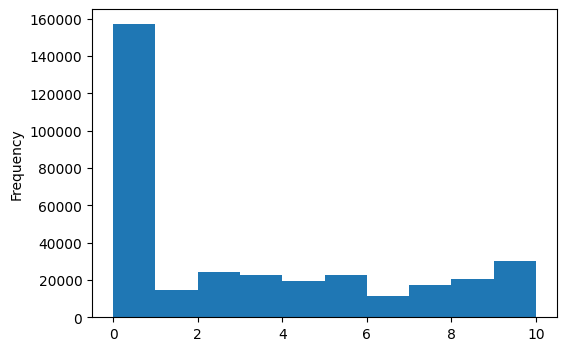

In [ ]:
# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏Æ‡∏¥‡∏™‡πÇ‡∏ï‡πÅ‡∏Å‡∏£‡∏°‡∏Ç‡∏≠‡∏á‡πÄ‡∏£‡∏ï‡∏ï‡∏¥‡πâ‡∏á‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏Å‡πà‡∏≠‡∏ô‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
book_rating_before_cleaned = df_ratings.groupby("isbn")["rating"].mean()
book_rating_before_cleaned.plot.hist(column=["rating"], figsize=(6, 4));

### Clean the data according to the instructions

In [ ]:
# ‡∏•‡∏ö‡∏ú‡∏π‡πâ‡πÉ‡∏ä‡πâ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡πÄ‡∏£‡∏ï‡∏ï‡∏¥‡πâ‡∏á‡∏ô‡πâ‡∏≠‡∏¢‡∏Å‡∏ß‡πà‡∏≤ 200 ‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£
user_counts = df_ratings['user'].value_counts()
users_to_keep = user_counts[user_counts >= 200].index
user_mask = df_ratings['user'].isin(users_to_keep)

# ‡∏•‡∏ö‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏ó‡∏µ‡πà‡∏°‡∏µ‡πÄ‡∏£‡∏ï‡∏ï‡∏¥‡πâ‡∏á‡∏ô‡πâ‡∏≠‡∏¢‡∏Å‡∏ß‡πà‡∏≤ 100 ‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£
book_ratings_counts = df_ratings['isbn'].value_counts()
books_to_keep = book_ratings_counts[book_ratings_counts >= 100].index
book_mask = df_ratings['isbn'].isin(books_to_keep)

# ‡∏Å‡∏£‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏£‡∏ï‡∏ï‡∏¥‡πâ‡∏á‡∏ï‡∏≤‡∏°‡πÄ‡∏á‡∏∑‡πà‡∏≠‡∏ô‡πÑ‡∏Ç
filtered_df_ratings = df_ratings[user_mask & book_mask]

In [ ]:
# ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏£‡∏∏‡∏õ‡∏Ç‡∏≠‡∏á‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏£‡∏ï‡∏ï‡∏¥‡πâ‡∏á‡∏ó‡∏µ‡πà‡∏Å‡∏£‡∏≠‡∏á‡πÅ‡∏•‡πâ‡∏ß
filtered_df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49781 entries, 1456 to 1147441
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    49781 non-null  int32  
 1   isbn    49781 non-null  object 
 2   rating  49781 non-null  float32
dtypes: float32(1), int32(1), object(1)
memory usage: 1.1+ MB


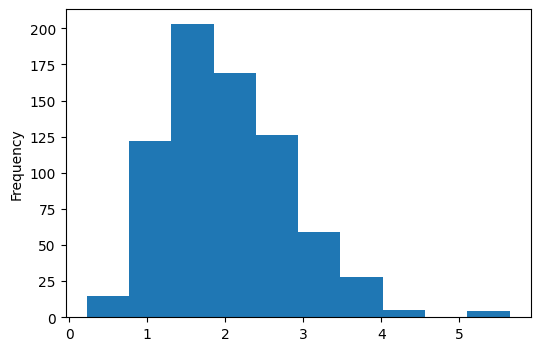

In [ ]:
# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡∏Æ‡∏¥‡∏™‡πÇ‡∏ï‡πÅ‡∏Å‡∏£‡∏°‡∏Ç‡∏≠‡∏á‡πÄ‡∏£‡∏ï‡∏ï‡∏¥‡πâ‡∏á‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏´‡∏•‡∏±‡∏á‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•

book_rating_after_cleaned = filtered_df_ratings.groupby("isbn")["rating"].mean()
book_rating_after_cleaned.plot.hist(column=["rating"], figsize=(6, 4));

# Modeling

In [ ]:
# ‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏Å‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏£‡∏ï‡∏ï‡∏¥‡πâ‡∏á‡∏ó‡∏µ‡πà‡∏Å‡∏£‡∏≠‡∏á‡πÅ‡∏•‡πâ‡∏ß
merged_data = filtered_df_ratings.merge(df_books, on='isbn')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49517 entries, 0 to 49516
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    49517 non-null  int32  
 1   isbn    49517 non-null  object 
 2   rating  49517 non-null  float32
 3   title   49517 non-null  object 
 4   author  49517 non-null  object 
dtypes: float32(1), int32(1), object(3)
memory usage: 1.9+ MB


In [ ]:
# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ï‡∏≤‡∏£‡∏≤‡∏á pivot ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ô‡∏ò‡πå‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡πÅ‡∏•‡∏∞‡∏ú‡∏π‡πâ‡πÉ‡∏ä‡πâ ‡πÇ‡∏î‡∏¢‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ñ‡∏∑‡∏≠‡πÄ‡∏£‡∏ï‡∏ï‡∏¥‡πâ‡∏á
rating_books_pivot = merged_data.pivot_table(index='title', columns='user', values='rating').fillna(0)
rating_books_pivot.head()


user                                                254     2276    2766    \
title                                                                        
1984                                                   9.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0    10.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Beautiful Mind: The Life of Mathematical Geni...     0.0     0.0     0.0   

user                                                2977    3363    4017    \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Beautiful Mind: The Life of Mathematical Geni...     0.0     0.0     0.0   

user                                                4385    6242    6251    \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Beautiful Mind: The Life of Mathematical Geni...     0.0     0.0     0.0   

user                                                6323    ...  274004  \
title                                                       ...           
1984                                                   0.0  ...     0.0   
1st to Die: A Novel                                    0.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
A Beautiful Mind: The Life of Mathematical Geni...     0.0  ...     0.0   

user                                                274061  274301  274308  \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Beautiful Mind: The Life of Mathematical Geni...     0.0     0.0     0.0   

user                                                274808  275970  277427  \
title                                                                        
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Beautiful Mind: The Life of Mathematical Geni...     0.0     0.0     0.0   

user                                                277478  277639  278418  
title                                                                       
1984                                                   0.0     0.0     0.0  
1st to Die: A Novel                                    0.0     0.0     0.0  
2nd Chance                                             0.0     0.0     0.0  
4 Blondes                                              0.0     0.0     0.0  
A Beautiful Mind: The Life of Mathematical Geni...     0.0     0.0     0.0  

[5 rows x 888 columns]

In [ ]:
# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• Nearest Neighbors ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ cosine similarity ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡∏ß‡∏±‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡∏Ñ‡∏•‡∏∂‡∏á
model_nn = NearestNeighbors(metric="cosine", algorithm="brute")

# ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏î‡πâ‡∏ß‡∏¢‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• pivot table
model_nn.fit(rating_books_pivot)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# ‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏´‡∏≤‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏ó‡∏µ‡πà‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡∏Å‡∏±‡∏ö "Where the Heart Is (Oprah's Book Club (Paperback))"
distances, indices = model_nn.kneighbors(rating_books_pivot.loc[["Where the Heart Is (Oprah's Book Club (Paperback))"]],
                                        6, return_distance=True)
# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏ó‡∏µ‡πà‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡∏Ñ‡∏•‡∏∂‡∏á
for i in range(len(indices[0])):
  print(rating_books_pivot.index[indices[0][i]]+" : "+str(distances[0][i]))

Where the Heart Is (Oprah's Book Club (Paperback)) : 0.0
The Lovely Bones: A Novel : 0.7234864
I Know This Much Is True : 0.7677075
The Surgeon : 0.7699411
The Weight of Water : 0.77085835
I'll Be Seeing You : 0.8016211


# Project Submission

In [ ]:
# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡πà‡∏≤‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏ó‡∏µ‡πà‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥
def get_recommends(book = ""):
  # ‡∏Ñ‡πâ‡∏ô‡∏´‡∏≤‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏ó‡∏µ‡πà‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡∏Ñ‡∏•‡∏∂‡∏á
  distances, indices = model_nn.kneighbors(rating_books_pivot.loc[["Where the Heart Is (Oprah's Book Club (Paperback))"]],
                                          6, return_distance=True)

  recommendations = []
  result = [book, recommendations]

  # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠‡∏ó‡∏µ‡πà‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏£‡∏∞‡∏¢‡∏∞‡∏´‡πà‡∏≤‡∏á (‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡∏Ñ‡∏•‡∏∂‡∏á)
  for i in range(len(indices[0])):
    recommendations.insert(0, [rating_books_pivot.index[indices[0][i]], round(distances[0][i],2)])

  return result

In [ ]:
# ‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

# ‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏ú‡πà‡∏≤‡∏ô‡πÇ‡∏à‡∏ó‡∏¢‡πå‡∏Ç‡∏≠‡∏á‡πÇ‡∏õ‡∏£‡πÄ‡∏à‡∏Ñ‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà
def test_book_recommendation():
  # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏Ñ‡∏≥‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏ï‡∏≤‡∏°‡πÄ‡∏Å‡∏ì‡∏ë‡πå
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! üéâüéâüéâüéâüéâ")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8], ['The Weight of Water', 0.77], ['The Surgeon', 0.77], ['I Know This Much Is True', 0.77], ['The Lovely Bones: A Novel', 0.72], ["Where the Heart Is (Oprah's Book Club (Paperback))", 0.0]]]
You passed the challenge! üéâüéâüéâüéâüéâ
